In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

In [69]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [71]:
print(df.isnull().sum())
print("Number of duplicate rows:", df.duplicated().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Number of duplicate rows: 0


In [73]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [75]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [77]:
print("Number of rows and columns:", df.shape)
print("Mean:\n", df.mean())
print("Median:\n", df.median())
print("Standard Deviation:\n", df.std())

Number of rows and columns: (768, 9)
Mean:
 Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64
Median:
 Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64
Standard Deviation:
 Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI              

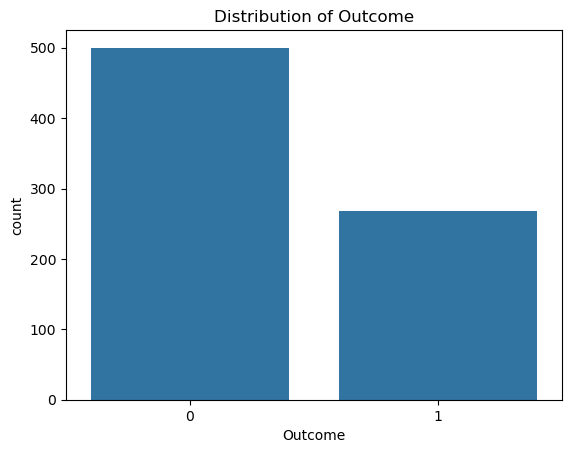

Outcome value counts:
Outcome
0    500
1    268
Name: count, dtype: int64


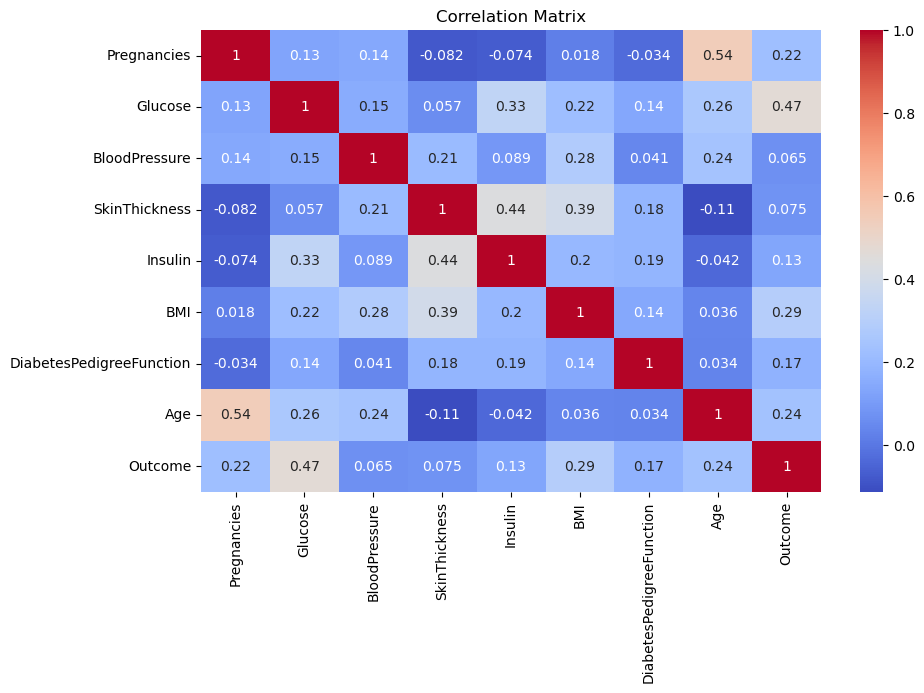

Correlation with Outcome:
 Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


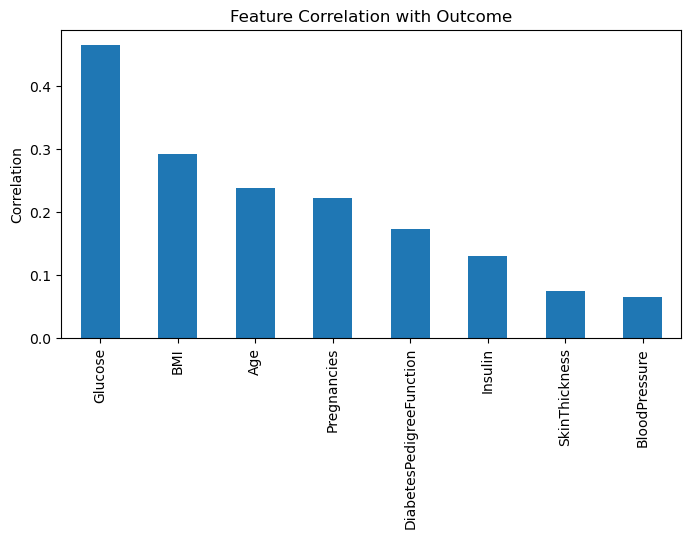

In [79]:
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Outcome")
plt.show()

print("Outcome value counts:")
print(df['Outcome'].value_counts())

corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

outcome_corr = corr_matrix['Outcome'].sort_values(ascending=False)
print("Correlation with Outcome:\n", outcome_corr)

outcome_corr.drop('Outcome').plot(kind='bar', figsize=(8,4))
plt.title("Feature Correlation with Outcome")
plt.ylabel("Correlation")
plt.show()

In [81]:
X = df.drop('Outcome', axis= 1)
y = df['Outcome']

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import *

polynomial_converter = PolynomialFeatures(degree=3, include_bias = False)
polynomial_features = polynomial_converter.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size = 0.3, random_state = 42)


scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train

array([[-0.8362943 , -0.80005088, -0.53576428, ..., -0.48163077,
        -0.69214741, -0.63763803],
       [ 0.39072767, -0.49054341,  0.12804365, ..., -0.52013175,
        -0.69392529, -0.46145684],
       [-1.14304979,  0.43797901, -0.09322566, ..., -0.39714255,
        -0.56541355, -0.58813772],
       ...,
       [ 1.92450513, -0.6143464 ,  0.90248622, ...,  1.86754144,
         1.58207069,  0.05162568],
       [-1.14304979,  0.62368349, -3.8548039 , ..., -0.49489412,
        -0.62222606, -0.42347439],
       [-1.14304979,  0.12847154,  1.45565949, ..., -0.48388728,
        -0.70761074, -0.65925545]])

In [83]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [85]:
test_predictions = log_model.predict(scaled_X_test)
test_predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [87]:
log_model.coef_

array([[ 0.72943185,  0.66347827,  0.07579519, -0.13307843, -0.51383724,
         0.60527889,  0.34762237,  0.73475601,  0.32280921,  0.19608023,
         0.50648326,  0.01744532, -0.47678248,  0.26070884,  0.67315542,
         0.02879396,  0.6882386 , -0.02874283, -0.22694784, -0.31708251,
         0.31175342,  0.40445764,  0.29258964, -0.22379283, -0.04146759,
        -0.25140972, -0.30263005,  0.13000084,  0.66969753,  0.20181852,
         0.11156138,  0.0014638 ,  0.07698341, -0.15020726, -0.03494613,
        -0.19292704,  0.0695092 ,  0.00567552,  0.4429852 ,  0.25651105,
         0.40135404, -0.03328888,  0.21452118,  0.0214042 ,  0.00643864,
         0.17044025, -0.34372002,  0.55348581,  0.44908709, -0.24272478,
        -0.32590583,  0.0220463 ,  0.14145251, -0.18012779, -0.81061884,
         0.107672  , -0.54723578, -0.67012355, -0.48531245, -0.03257968,
        -0.30520319, -0.04022254, -0.33760637, -0.00148682, -0.02351135,
         0.03154127,  0.11893112, -0.11967704,  0.4

In [89]:
y_prob = log_model.predict_proba(X_test)
y_prob

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Accuracy is not high enoguh compared to recall and precision, so no.

Accuracy: 0.7273
Precision: 0.6133
Recall: 0.5750
F1-score: 0.5935


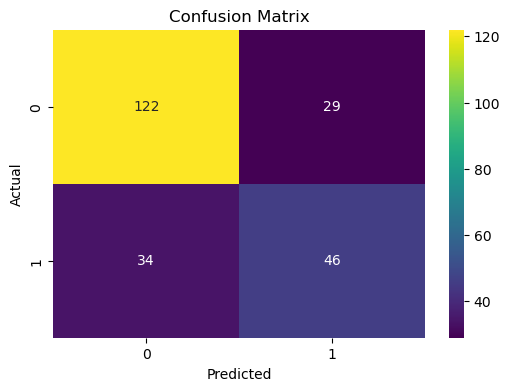

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_predictions)
cmap = plt.cm.viridis

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap= cmap, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [102]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_scaled, y)

for feature, coef in zip(X.columns, final_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

Pregnancies: 0.4088
Glucose: 1.1073
BloodPressure: -0.2508
SkinThickness: 0.0090
Insulin: -0.1308
BMI: 0.6964
DiabetesPedigreeFunction: 0.3089
Age: 0.1766


In [108]:
import joblib

joblib.dump(final_model, "final_logistic_model.joblib")

['final_logistic_model.joblib']

In [110]:
joblib.dump(scaler, "standard_scaler.joblib")

['standard_scaler.joblib']

In [114]:
loaded_model = joblib.load("final_logistic_model.joblib")
loaded_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [116]:
loaded_scaler = joblib.load("standard_scaler.joblib")
loaded_scaler

,copy,True
,with_mean,True
,with_std,True


In [118]:
data = { 'Pregnancies': [4, 7, 1],
'Glucose': [112, 150, 99],
'BloodPressure': [78, 66, 58],
'SkinThickness': [31, 42, 10],
'Insulin': [0, 342, 0],
'BMI': [39.4, 34.7, 25.4],
'DiabetesPedigreeFunction': [0.236, 0.718, 0.551],
'Age': [33, 42, 21]
} 
new_data_df = pd.DataFrame(data)
new_data_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,4,112,78,31,0,39.4,0.236,33
1,7,150,66,42,342,34.7,0.718,42
2,1,99,58,10,0,25.4,0.551,21


In [180]:
X_new_scaled = loaded_scaler.transform(X_new)

y_prediction = loaded_model.predict(X_new_scaled)

new_data_df["Outcome"] = y_prediction
new_data_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,112,78,31,0,39.4,0.236,33,0
1,7,150,66,42,342,34.7,0.718,42,1
2,1,99,58,10,0,25.4,0.551,21,0
